In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: (10 pts) A particle of mass $m$ moving through a fluid is subjected to viscous resistance $R(v)$, where $v$ is the particle's velocity.  Suppose that relationship between the resistance $R$, velocity $v$, and the time of travel is given by 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du, 
$$
where $v_{0} = v(0)$ is the intial velocity of the particle.  Now suppose that 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

** Problem 2 ** : (10 pts) The equation
$$
f(x) = \int_{0}^{x}\frac{1}{\sqrt{2\pi}}e^{-t^{2}/2} dt = .45, 
$$
can be solved via Newton's Method.  Using the Fundamental Theorem of Calculus, we readily get that 
$$
f'(x) = \frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}.
$$
Then we just need a way of approximating the integral in order to evaluate 
$$
f(x) - .45.  
$$
Use the Trapezoid Method to find the integral and thus the function $f(x)$.  Starting from an initial guess $x_{0} = .5$, what is an approximation to the root $x_{\ast}$ such that $f(x_{\ast})=.45$?  How does your approximation to the root change as you change mesh size of the Trapezoid Method?  

In [17]:
def fexp(t):
    return np.exp(-t**2./2.)/np.sqrt(2.*np.pi)

def trapezoid_method(a,b,N,f):
    Nind = int(N)
    fvals = f(np.linspace(a,b,Nind+1))
    return (b-a)/(2*N)*(fvals[0]+fvals[Nind]+2.*np.sum(fvals[1:Nind]))

def Newtons_method(fp,x0,N,tol):
    f0 = trapezoid_method(0,x0,N,fp)
    f0 -= .45
    x1 = x0 - f0/fp(x0)
    while np.abs(x1-x0)>tol:
        x0 = x1
        f0 = trapezoid_method(0,x0,N,fp)
        f0 -= .45
        x1 = x0 - f0/fp(x0)
        
    return x1

In [22]:
print Newtons_method(fexp,.5,100,1e-6)
print Newtons_method(fexp,.5,1000,1e-6)
print Newtons_method(fexp,.5,100,1e-10)
print Newtons_method(fexp,.5,1000,1e-10)
print Newtons_method(fexp,.5,10000,1e-10)

1.64489071357
1.6448539978
1.64489071357
1.6448539978
1.64485363066


** Problem 3 ** (20 pts): Here we are going to finish the derivation of Simpson's method.  Again, as we stated in class, we are trying to approximate an integral over three mesh points, $[x_{j},x_{j+2}]$, by integrating an approximating parabola as in 

$$
\int_{x_{j}}^{x_{j+2}}f(x) dx \approx \int_{x_{j}}^{x_{j+2}} y_{j+1}(x)dx, ~ y_{j+1}(x) = a_{j+1}(x-x_{j+1})^{2} + b_{j+1}(x-x_{j+1}) + c_{j+1}.
$$

Again, 

$$
x_{j+1} - x_{j} = \delta x = \frac{b-a}{N}.
$$

Now, once we know the coefficients $a_{j+1}$, $b_{j+1}$, and $c_{j+1}$, we can readily integrate our approximating polynomial so that we get 

\begin{align}
\int_{x_{j}}^{x_{j+2}} y_{j+1}(x)dx = & \int_{x_{j}}^{x_{j+2}} \left(a_{j+1}(x-x_{j+1})^{2} + b_{j+1}(x-x_{j+1}) + c_{j+1} \right)dx\\
= & \int_{-\delta x}^{\delta x} \left(a_{j+1}u^{2} + b_{j+1}u + c_{j+1}\right) du, ~ u = x-x_{j+1}\\
= & \frac{2 a_{j+1}}{3}\left(\delta x\right)^{3} + 2c_{j+1}\delta x
\end{align}

To find $a_{j+1}$, $b_{j+1}$, and $c_{j+1}$, we use the _interpolation_ requirements that 

\begin{align}
y_{j+1}(x_{j}) = & f(x_{j})\\
y_{j+1}(x_{j+1}) = & f(x_{j+1})\\
y_{j+1}(x_{j+2}) = & f(x_{j+2})
\end{align}

Abbreviate $f_{j} = f(x_{j})$,  $f_{j+1} = f(x_{j+1})$,  $f_{j+2} = f(x_{j+2})$.  Then

i) (2pts) Show using the second interpolation requirement that $c_{j+1} = f_{j+1}$.

ii) (4pts) Show the first and third interpolation requirements can then be written as two equations in two unknowns in the form 
\begin{align}
a_{j+1} \delta x - b_{j+1} =&  \left(f_{j}-f_{j+1}\right)/\delta x\\
a_{j+1} \delta x + b_{j+1} =&  \left(f_{j+2}-f_{j+1}\right)/\delta x\\
\end{align}

iii) (2pts) From this, show that 
$$
a_{j+1} = \frac{f_{j+2} - 2f_{j+1} + f_{j}}{2(\delta x)^{2}}
$$
and thus
$$
\int_{x_{j}}^{x_{j+2}} y_{j+1}(x)dx = \frac{\delta x}{3}\left(f_{j} + 4f_{j+1} + f_{j+2} \right)
$$
This is the _local_ Simpson's method.

iv) (2pts) Let $N=2m$, the number of intervals in your mesh be an even number.  Letting then $a=x_{0}$, $b=x_{2m}$, show that
$$
\int_{a}^{b}f(x) dx = \sum_{j=0}^{m-1}\int_{x_{2j}}^{x_{2j+2}} f(x) dx.
$$

v) (2pts) Show using the local Simpson's method and iv) above the global Simpson's method, which is 
$$
\int_{a}^{b}f(x) dx \approx \frac{\delta x}{3}\left(f(x_{0})+f(x_{2m})+2\sum_{l=1}^{m-1}f_{2l} + 4\sum_{l=1}^{m}f_{2l-1} \right).
$$

vi) (2pts) Implement the global Simpson's method in Python.  Note, this should only take two lines, but you will need to use slightly more clever slicing of NumPy arrays to get it done.  For example, if I define 

`vals = np.array([1., 2., 3., 4., 5.])`

then we can take slices of arrays in which we get only the even or odd indices by using 

`vals[0::2] = [1.,3.,5.]`

`vals[1::2] = [2.,4.]`

You will need to use this kind of slicing in your implementation of the global Simpson's method.

vii) (6pts) Using the identity

$$
\frac{\pi}{2} = \int_{-1}^{1} \frac{dx}{1+x^{2}},
$$

find the power $p$ which characterizes how the error, say $C(\delta x)^{p}$, changes for Simpson's method.  Provide the necessary log plot and compute the slope of the line as explained in the course notes.    

In [11]:
def fun(x):
    return np.sin(x)

def simpson_method(a,b,N,f):
    xvals = np.linspace(a,b,N+1)
    fvals = f(xvals)
    return (b-a)/(3.*N)*(fvals[0]+fvals[N] + 2.*np.sum(fvals[2:N-1:2]) + 4.*np.sum(fvals[1:N:2]))

def error_test(a,b,f):
    tval = 1.-np.cos(1.)
    Nvals = np.array([1e1, 50, 1e2, 200, 400, 800, 1e3])
    Evals = np.zeros(Nvals.size)
    for jj in xrange(0,Nvals.size):
        Evals[jj] = np.log10(np.abs(tval - simpson_method(a,b,int(Nvals[jj]),f)))
    xvals = np.log10(Nvals)
    plt.plot(xvals,Evals)
    novals = Evals.size
    slopes = (Evals[1:]-Evals[0:novals-1])/(xvals[1:]-xvals[0:novals-1])
    print np.min(slopes)
    print np.max(slopes)
    print np.mean(slopes)

-4.02766029728
-3.9919983431
-4.00329000686


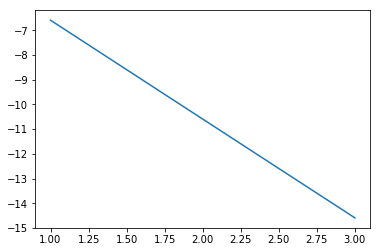

In [12]:
error_test(0,1.,fun)